In [1]:
import pyjags
import numpy as np
import pyjags.model
from sim_data import SimParams
from sim_model import SimModel
from sim_results import SimResults
import matplotlib.pyplot as plt
import arviz as az
import pandas as pd

In [2]:
params = SimParams(
    nsites=25,
    nsurveys_aru=3,
    nsurveys_pc=3,
    covar_continuous=True,
    beta0=0,
    beta1=1,
    threshold=0,
    include_covar_model=False
)


def run_sim():
    model = SimModel(params)

    samples = model.sample()
    return samples


sim_results = SimResults(params)

for _ in range(10):
    samples = run_sim()
    sim_results.append_samples(samples)

JagsError: RUNTIME ERROR:
Compilation error on line 6.
Unknown variable psi
Either supply values for this variable with the data
or define it  on the left hand side of a relation.


In [10]:
sim_results.sim_params.beta1

1

In [3]:
summary = sim_results.get_summary()

In [11]:
summary["beta1"]

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
0,1.672,0.633,0.507,2.859,0.004,0.003,28106.0,25151.0,1.0


(array([2.000e+00, 4.000e+00, 1.200e+01, 4.500e+01, 1.490e+02, 4.920e+02,
        1.125e+03, 2.206e+03, 3.975e+03, 5.766e+03, 7.316e+03, 7.812e+03,
        7.191e+03, 5.376e+03, 3.478e+03, 1.846e+03, 8.180e+02, 2.890e+02,
        8.700e+01, 1.100e+01]),
 array([0.20370519, 0.22940663, 0.25510807, 0.28080952, 0.30651096,
        0.3322124 , 0.35791385, 0.38361529, 0.40931673, 0.43501818,
        0.46071962, 0.48642106, 0.51212251, 0.53782395, 0.56352539,
        0.58922684, 0.61492828, 0.64062972, 0.66633117, 0.69203261,
        0.71773405]),
 <BarContainer object of 20 artists>)

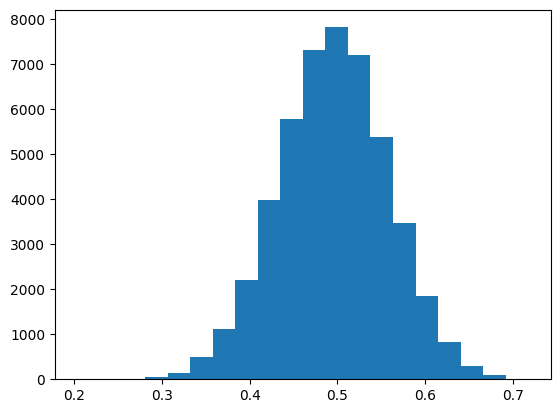

In [17]:
plt.hist(samples["p_aru11"].reshape(-1), bins=20)